In [147]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [58]:
t = pd.read_csv("TreesData.csv", low_memory=False)

In [5]:
q = t['neighborhood'].unique()
w = len(t['neighborhood'].unique())
print(q)
print("Total: ", w)

['Homewood North' 'Oakwood' 'South Side Flats' 'East Allegheny'
 'Highland Park' 'Stanton Heights' 'Sheraden' 'Chartiers City' 'Elliott'
 'Morningside' 'Bloomfield' 'Friendship' 'Garfield' 'Polish Hill'
 'Lower Lawrenceville' 'Central Northside' 'East Liberty'
 'Central Lawrenceville' 'Shadyside' 'Allegheny Center' 'Homewood South'
 'Point Breeze North' 'East Hills' 'Homewood West' 'Greenfield'
 'Hazelwood' 'Squirrel Hill South' 'Marshall-Shadeland' 'Brighton Heights'
 'North Shore' 'Overbrook' 'Knoxville' 'Brookline' 'South Side Slopes'
 'Arlington' 'Arlington Heights' 'Carrick' 'Bedford Dwellings'
 'Central Business District' 'Bluff' 'West Oakland' 'South Oakland'
 'Squirrel Hill North' 'Point Breeze' 'Lincoln-Lemington-Belmar' 'Bon Air'
 'Mount Washington' 'California-Kirkbride' 'New Homestead'
 'Central Oakland' 'Crafton Heights' 'Beechview' 'Manchester' 'Allentown'
 'Beltzhoover' 'Allegheny West' 'Chateau' 'Duquesne Heights' 'Perry North'
 'Perry South' 'Middle Hill' 'Troy Hill' '

# ------------------------------------------------------------------------------------

## Data Analysis:

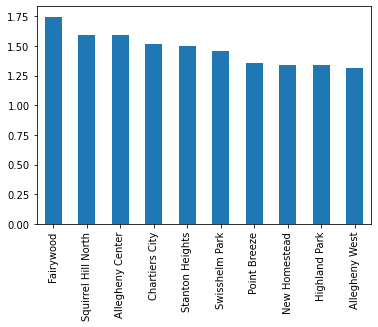

In [160]:
neighborhoodList=[]
averageCO2ValueList=[]
for a in q: 
    neighborhoodList.append(a)

for n in neighborhoodList:
    b = t['neighborhood'] == n
    bb = t[b]
    BBB = bb['co2_benefits_dollar_value'].mean()
    averageCO2ValueList.append(BBB)

allData = pd.Series(averageCO2ValueList, index=neighborhoodList)
allData.sort_values(ascending=False, inplace=True)
topTenData=allData.head(10)
topTenData.plot.bar()

### Rankings for the highest average CO2 Dollar Value by neighborhood.

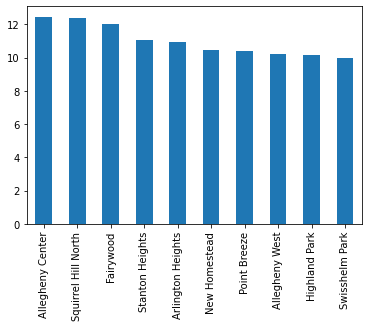

In [161]:
neighborhoodList=[]
averageAQValueList=[]
for a in q: 
    neighborhoodList.append(a)

for n in neighborhoodList:
    b = t['neighborhood'] == n
    bb = t[b]
    BBB = bb['air_quality_benfits_total_dollar_value'].mean()
    averageAQValueList.append(BBB)


allData6 = pd.Series(averageAQValueList, index=neighborhoodList)
allData6.sort_values(ascending=False, inplace=True)
topTenData6=allData6.head(10)
topTenData6.plot.bar()


### Rankings for the highest average Air Quality Dollar Value by neighborhood.

# ------------------------------------------------------------------------------------

## It is not enough to have one or the other. Instead, we are looking for a neighborhood that excels in both. Therefore, I am averaging the two stats.

In [162]:
dataAddition = allData6+allData 
dataAddition.sort_values(ascending=False, inplace=True)
dataAddition = dataAddition/2
dataAddition
#dataAddition10=dataAddition.head(10)
#dataAddition10.head(10)

Allegheny Center       7.022776
Squirrel Hill North    7.001231
Fairywood              6.878808
Stanton Heights        6.289645
Arlington Heights      6.014613
                         ...   
South Shore            1.327748
Glen Hazel             0.926183
Hays                   0.915929
Troy Hill              0.758208
NaN                         NaN
Length: 91, dtype: float64

## The higher average value of trees, the more effictive those trees will be for the environment for that neighborhood. 

## However, the current data only shows the average value of trees within a neighborhood. What does this mean? It means that the current amount of data does not take in the quantity of trees within a neighborhood. A neighborhood with ONE very good tree will beat out the average value of a neighborhood with thousands of trees, even though the latter will have a lot bigger impact on the environment.

## To compensate for this, I am multipling the average value of trees in a neighborhood by the quantity of trees in that neighborhood to find the true value of trees in the neighborhood. The higher the product, the better it is for the environment. 

In [163]:
tN = t.groupby(["neighborhood"])["neighborhood"].count()
tN.sort_values(ascending=False, inplace=True)
tN

neighborhood
Squirrel Hill South    5073
Highland Park          2941
Squirrel Hill North    2083
South Side Flats       1693
Shadyside              1558
                       ... 
Arlington Heights         5
Esplen                    3
Glen Hazel                2
South Shore               2
Hays                      1
Name: neighborhood, Length: 90, dtype: int64

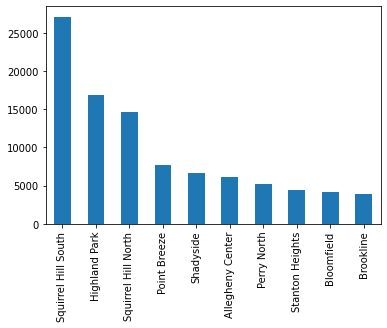

In [173]:
rankings = dataAddition*tN
rankings.sort_values(ascending=False, inplace=True)
top10Rankings = rankings.head(10)
top10Rankings.plot.bar()

# Conclusion:

I multiplied the average value of trees in a neighborhood, by the amount of trees in the neighborhood. The higher the product, the more value the trees provide, and therefore the more environmentally beneficial it is. From the chart above, I can confidently declare that Squirrel Hill South is THE best neighborhood.